In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

### Load data

In [30]:
df=pd.read_csv('Dataset FOr HAR.csv')

In [31]:
df.head()

,timeElapsed,x,y,z,label
0,0.000,0.413040,0.878448,0.026169,standToSit1
1,0.100,0.462570,0.758789,0.313019,standToSit1
2,0.199,0.546524,0.559891,0.594940,standToSit1
3,0.299,0.348984,0.484650,0.514313,standToSit1
4,0.398,0.515930,0.342545,0.696701,standToSit1


In [5]:
df['label'].unique()

array(['standToSit1', 'sitToStand1', 'stairDown', 'stairUp', 'walk',
       'stand'], dtype=object)

## Plot Axies of Accelerometer Dataset 

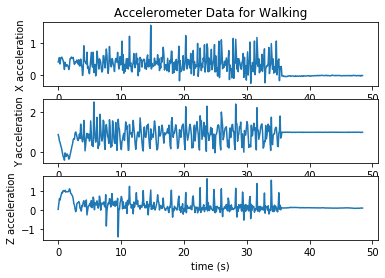

<Figure size 720x720 with 0 Axes>

In [6]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [7]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [10]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [11]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

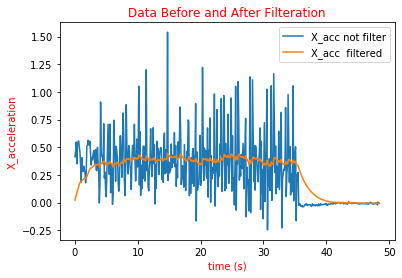

In [12]:
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('Data Before and After Filteration',color='red')
plt.ylabel('X_acceleration',color='red')
plt.xlabel('time (s)',color='red')
plt.legend()
plt.show()

No handles with labels found to put in legend.


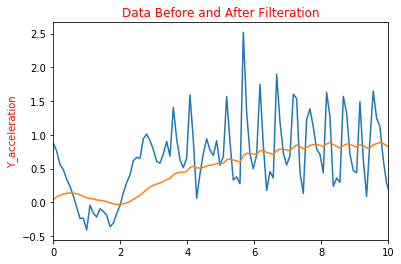

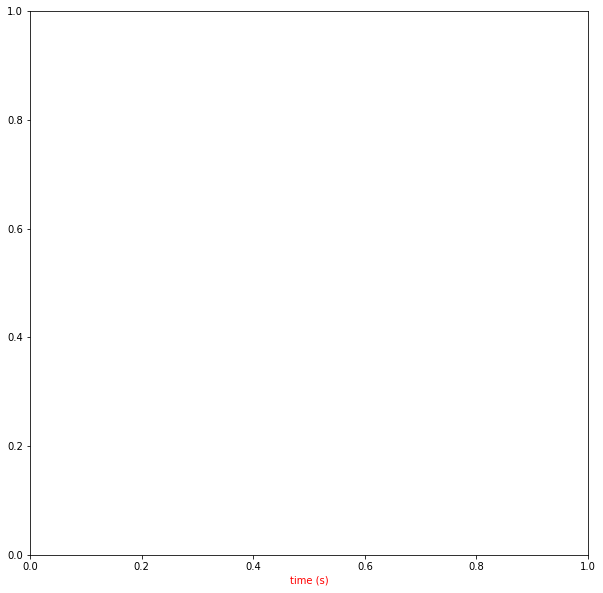

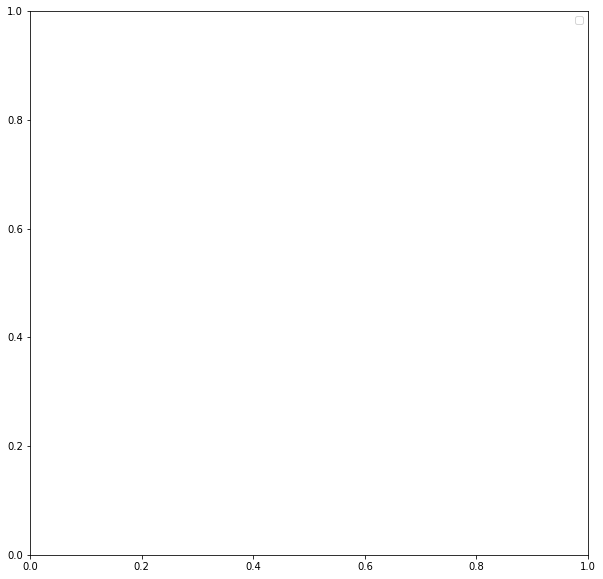

In [123]:
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Data Before and After Filteration',color='red')
plt.ylabel('Y_acceleration',color='red')
plt.xlim([0,10])
plt.xlabel('time (s)',color='red')
plt.legend()
plt.show()

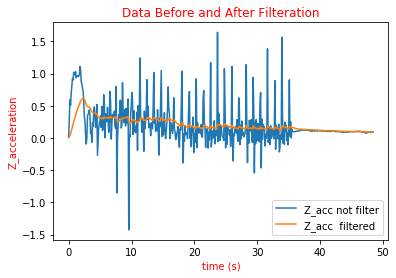

In [14]:
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red')
plt.ylabel('Z_acceleration',color='red')
plt.xlabel('time (s)',color='red')
plt.legend()
plt.show()

### Apply smoothing to data

In [15]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


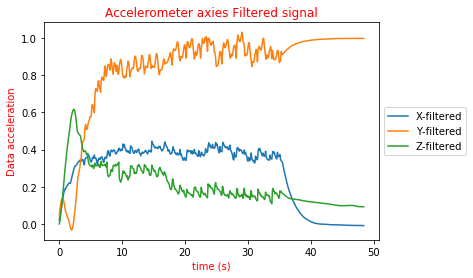

In [16]:
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red')
plt.ylabel('Data acceleration',color='red')
plt.xlabel('time (s)',color='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

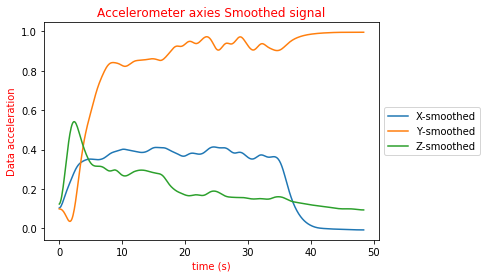

In [43]:
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies Smoothed signal',color='red')
plt.ylabel('Data acceleration',color='red')

plt.xlabel('time (s)',color='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Applying FD,XYZ & Searching for Strides

In [39]:
df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

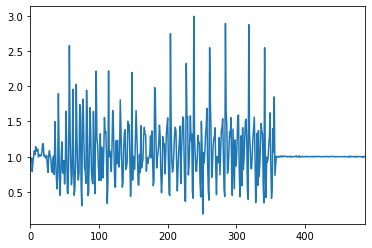

In [70]:
XYZ.plot();

In [148]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [149]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [150]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

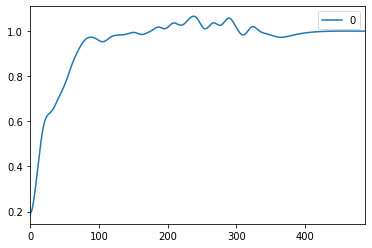

In [153]:
xyz_smoothed.plot()

In [151]:
peak=xyz_smoothed.values.flatten()

In [152]:
peak.shape

(488,)

In [133]:
from scipy.signal import find_peaks,peak_widths
peak_x, _ = find_peaks(peak)


In [146]:
np.argmax(peak_x)

8

In [112]:
t=df['timeElapsed']

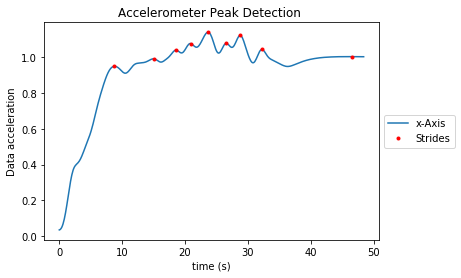

<Figure size 576x576 with 0 Axes>

In [147]:
plt.plot(df['timeElapsed'],xyz_smoothed,label='x-Axis')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Strides')
plt.title('Accelerometer Peak Detection ')
plt.ylabel('Data acceleration')
plt.xlabel('time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(8,8))
plt.show()